**Подключение библиотек и скриптов**

In [56]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
matplotlib.rcParams.update({'font.size': 14})

In [60]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    """
    # дописать документация
    """
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Valid R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))

    plt.figure(figsize=(18,10))
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

**Пути к директориям и файлам**

In [61]:
TRAIN_DATASET_PATH = 'C:/Users/Виктория/data/train.csv' # y_train, y_valid
TEST_DATASET_PATH = 'C:/Users/Виктория/data/test.csv'

### Загрузка данных

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [62]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [63]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


In [64]:
train_df.shape[1]-1 == test_df.shape[1]

True

### Приведение типов

In [65]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [66]:
train_df.dtypes.value_counts()

int64      9
float64    8
object     3
dtype: int64

In [67]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)
test_df['Id'] = test_df['Id'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

### Обзор данных

**Целевая переменная**

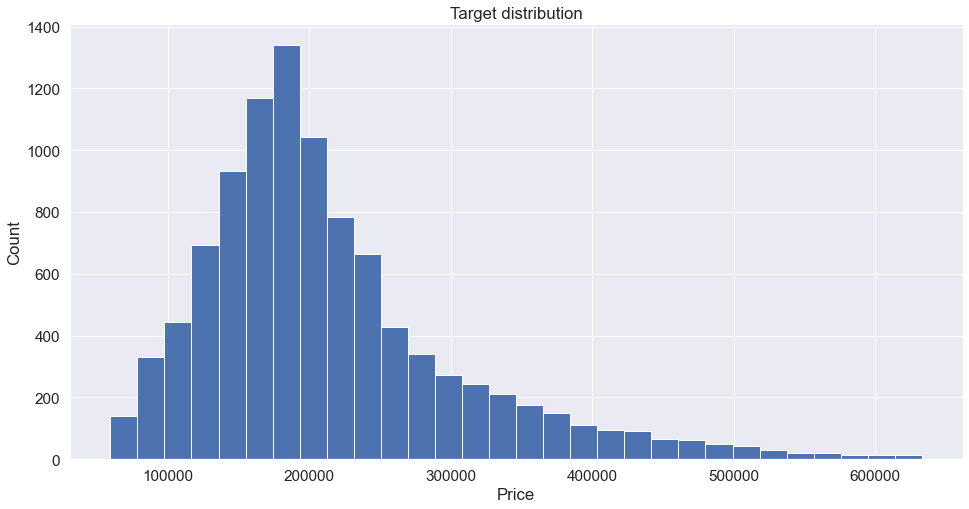

In [68]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

Распледеление блзко к логнормальному. Построим еще одну диаграмму с модой, медианой и средним значением целевой переменной.  


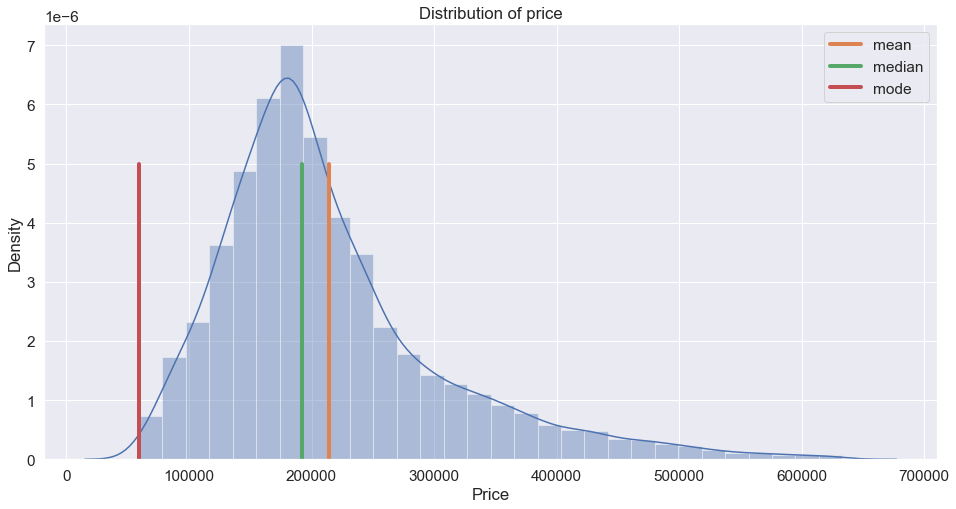

In [69]:
target_mean = round(train_df['Price'].mean(), 2)
target_median = train_df['Price'].median()
target_mode = train_df['Price'].mode()[0]

plt.figure(figsize = (16, 8))

sns.distplot(train_df['Price'], bins=30)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean',  linewidth=4)
plt.plot([target_median] * 10, y, label='median',  linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linewidth=4)

plt.title('Distribution of price')
plt.legend()

Мода смещена влево, меньше среднего и медианы. 
Как это может повлиять на модель и что с этим делать понять не удалось.

Построим диаграммы для числовых признаков.

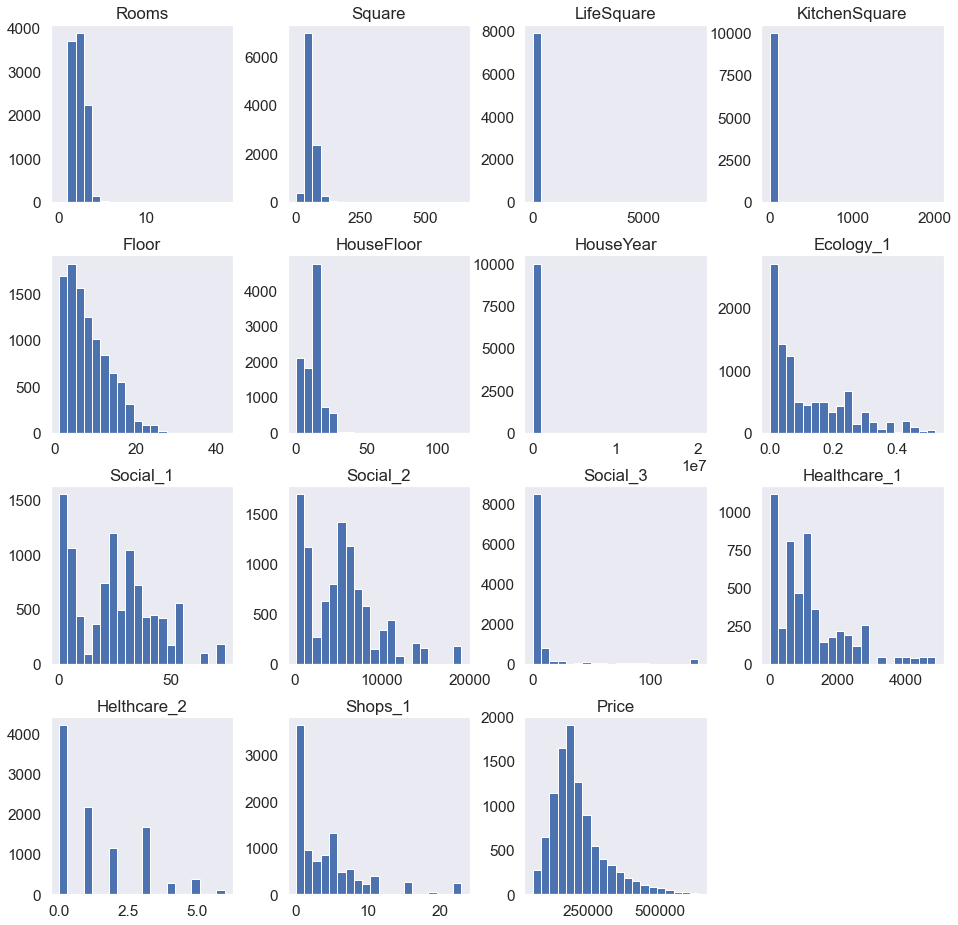

In [70]:
df_num_features = train_df.select_dtypes(include=['float64', 'int64'])
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

Видно, что в признаках Rooms, Square, LifeSquare, KitchenSquare, HouseFloor, HouseYear, Healthcare_1 имеются выбросы. Следует от них избавится. 
Social_1 и Social_2 отличаются незначительно, можно эти признаки объединить. 

**Количественные переменные**

In [71]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Из таблицы видно, что в данных есть пропуски, нулевые значения. 

**Категориальные переменные**

In [72]:
cat_colnames = train_df.select_dtypes(include='object').columns.tolist()
cat_colnames

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [73]:
for cat_colname in cat_colnames[2:]:
    print(str(cat_colname) + '\n\n' + str(train_df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Ecology_2

B    9903
A      97
Name: Ecology_2, dtype: int64
****************************************************************************************************

Ecology_3

B    9725
A     275
Name: Ecology_3, dtype: int64
****************************************************************************************************

Shops_2

B    9175
A     825
Name: Shops_2, dtype: int64
****************************************************************************************************



### Обработка выбросов

Рассмотрим признаки в которых были выбросы подробнее. 

In [74]:
#Rooms

In [75]:
train_df['Rooms'].value_counts().sort_index()

0.0        8
1.0     3705
2.0     3880
3.0     2235
4.0      150
5.0       18
6.0        1
10.0       2
19.0       1
Name: Rooms, dtype: int64

Значения 0, 5, 6, 10, 19 монжно примем за выбросы

In [76]:
#Square

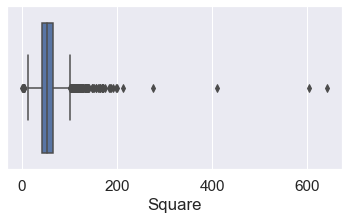

In [77]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['Square'], whis=1.5)

plt.xlabel('Square')
plt.show()

Значения больше 150 и меньше 15 являются выбросами. Заменим их на медиану.

In [78]:
#LifeSquare

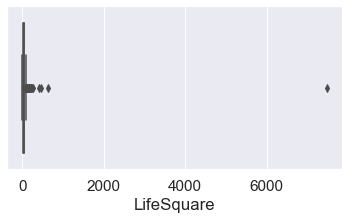

In [79]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['LifeSquare'], whis=1.5)

plt.xlabel('LifeSquare')
plt.show()

Значения больше 150 выбросами. Заменим их на медиану.

In [80]:
#KitchenSquare

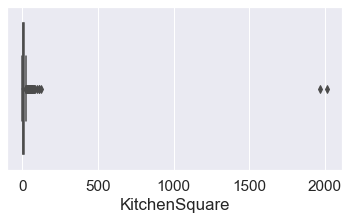

In [81]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['KitchenSquare'], whis=1.5)

plt.xlabel('KitchenSquare')
plt.show()

Значения больше 50 выбросами. Заменим их на медиану.

In [82]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


В некоторых строках сумма жилой площади и кухни больше общей площади квартиры. 

In [83]:
mask = train_df["Square"] < train_df["KitchenSquare"] + train_df["LifeSquare"]
train_df.loc[mask].describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,313.000000,845.000000,845.000000,845.000000
mean,1.766864,59.145433,68.782054,11.160947,9.797633,14.101775,2000.353846,0.105389,16.360947,3771.007101,8.663905,882.322684,0.871006,3.528994,200907.622912
std,0.824012,32.663061,257.842899,97.293152,6.024869,8.652264,19.752893,0.109640,17.079439,3982.369298,28.699550,721.557527,1.368631,5.267550,99063.886453
min,1.000000,1.136859,1.626502,0.000000,1.000000,0.000000,1918.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,59877.592523
25%,1.000000,41.481906,41.675761,1.000000,5.000000,9.000000,1977.000000,0.014073,2.000000,629.000000,0.000000,540.000000,0.000000,0.000000,133166.163513
50%,2.000000,53.258610,53.983730,1.000000,8.000000,17.000000,2015.000000,0.072158,8.000000,1564.000000,1.000000,705.000000,0.000000,1.000000,177948.133001
75%,2.000000,68.767146,68.712203,10.000000,14.000000,17.000000,2017.000000,0.195781,26.000000,6207.000000,4.000000,1046.000000,1.000000,5.000000,237969.144323
max,5.000000,641.065193,7480.592129,2014.000000,28.000000,117.000000,2020.000000,0.486246,74.000000,19083.000000,141.000000,4508.000000,6.000000,23.000000,621002.912679


In [84]:
#HouseFloor

In [85]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [86]:
#Floor

In [87]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

В признаке HouseFloor явно есть выбросы. 

In [88]:
#HouseYear

In [89]:
train_df['HouseYear'].value_counts().sort_index()

1910          1
1912          2
1914          1
1916          1
1917          3
           ... 
2018        175
2019         79
2020         19
4968          1
20052011      1
Name: HouseYear, Length: 97, dtype: int64

Заменим значения больше, чем 2020 - 2020 годом.

### Обработка пропусков

In [90]:
len(train_df) - train_df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

В LifeSquare и Healthcare_1 имеются пропуски. 

Построим матрицу корреляций 

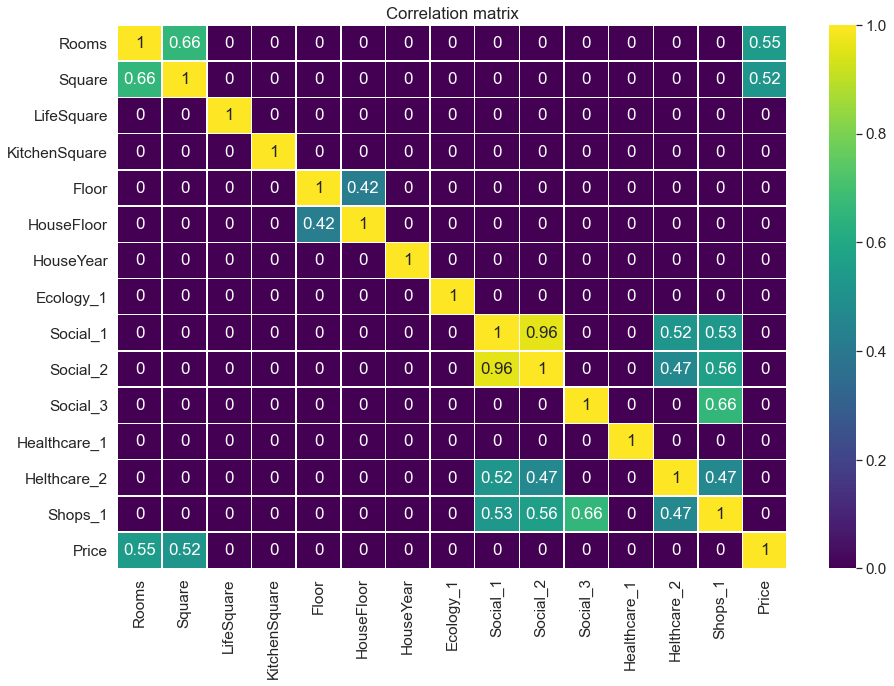

In [91]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='viridis')

plt.title('Correlation matrix')
plt.show()

Признак Helthcare_2 связан с Social_1, Social_2, Shops_1 и Districtid. Посмотрим, какие значения хранит этот признак. 

In [92]:
train_df['Helthcare_2'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

Можем построить признак среднего значения в районе.

### Построение новых признаков

* Приведем категориальные признаки Shops_1, Ecology_2, Ecology_3 к числовому типу. Так как они содержат значения A и B, можем их заменить на 0 и 1. 
* Объединим Social_1 и Social_2
* Введем новый признак MedPriceByDistrict(средняя цена в зависимости от количетсва комант и района)
* Так же добавим признак - средняя цена по райну на один квадратный метр. 

### Класс обработки данных

In [93]:
class Data:
    
    def __init__(self):
       
        self.Square_min = 15
        self.Square_max = 200
        
        self.LifeSquare_min = 10
        self.LifeSquare_max = 200
        
        self.KitchenSquare_min = 3
        self.LifeSquare_max = 15
        
        self.medians = None
        self.DistrictId_value_counts = None
        self.SquareMeterPrice_by_DistrictId = None
        self.Healthcare_1_by_DistrictId = None
        
        
    def fit(self, df):
        
        # медианны
        self.medians = df[['LifeSquare', 'HouseFloor']].median()
        
        # подсчет популярных районов
        self.DistrictId_value_counts = dict(df['DistrictId'].value_counts())
        
        # подсчет средней цены за м2 по району
        df_temp = df.loc[((df['Square'] > self.Square_min) & (df['Square'] < self.Square_max))]
        df_temp["Square_Meter_Price"] = df_temp["Price"] / df_temp["Square"]
        self.SquareMeterPrice_by_DistrictId = df_temp.groupby('DistrictId', as_index=False)\
            .agg({'Square_Meter_Price': 'mean'})\
            .rename(columns={'Square_Meter_Price': 'Average_Square_Price'})
        
        # подсчет среднего значения признака Healthcare_2 по району
        self.Helthcare_2_by_DistrictId = df.groupby('DistrictId', as_index=False)\
            .agg({'Helthcare_2': 'mean'})\
            .rename(columns={'Helthcare_2': 'Average_Helthcare_2'})
        
        del df_temp
        
    def transform(self, df):
        
        # Обработка пропусков
        df[['LifeSquare', 'HouseFloor']] = df[['LifeSquare', 'HouseFloor']].fillna(self.medians)
        df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()
        
        # Обработка выбросов
        
        # количество комнат
        df.loc[df['Rooms'].isin([0, 6, 10, 19]), 'Rooms'] = df['Rooms'].median()
        
        # жилая площадь
        df.loc[(df['LifeSquare'] < self.LifeSquare_min), 'LifeSquare'] = self.LifeSquare_min
        df.loc[(df['LifeSquare'] > self.LifeSquare_max), 'LifeSquare'] = self.LifeSquare_max
        
        # площадь кухни
        df.loc[(df['KitchenSquare'] < self.KitchenSquare_min), 'KitchenSquare'] = self.KitchenSquare_min
        
        # площадь
        df.loc[(df['Square'] > self.Square_max), 'Square'] = self.Square_max
        df.loc[(df['Square'] < self.Square_min), 'Square'] = self.Square_min
        df.loc[df['Square'] < (df["KitchenSquare"] + df["LifeSquare"]), 'Square'] = df["KitchenSquare"] + df["LifeSquare"] + 10
        
        # год постройки дома
        df.loc[df['HouseYear'] > 2020, 'HouseYear'] = 2020
        
        # количество этажей
        df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = int(df['HouseFloor'].median())
        np.random.seed(27)
        floor_outliers = df[df['Floor'] > df['HouseFloor']].index
        print(len(floor_outliers))

        df.loc[floor_outliers, 'Floor'] = df.loc[floor_outliers, 'HouseFloor'].apply(
            lambda x: random.randint(1, x)
        )
        
        # Обработка категорий
        df = pd.concat([df, pd.get_dummies(df['Ecology_2'], prefix='Ecology_2', dtype='int8')], axis=1)
        df = pd.concat([df, pd.get_dummies(df['Ecology_3'], prefix='Ecology_3', dtype='int8')], axis=1)
        df = pd.concat([df, pd.get_dummies(df['Shops_2'], prefix='Shops_2', dtype='int8')], axis=1)
        
        return df
    
    def features(self, df):
        
        # признак средней стоимости м2 по району
        df = df.merge(self.SquareMeterPrice_by_DistrictId, on=["DistrictId"], how='left')
        df['Average_Square_Price'].fillna(df['Average_Square_Price'].median(), inplace=True)
        
        # признак среднего значения Helthcare_2 по району
        df = df.merge(self.Helthcare_2_by_DistrictId, on=["DistrictId"], how='left')
        df['Average_Helthcare_2'].fillna(df['Average_Helthcare_2'].median(), inplace=True)
        
        df["SociaLL"] = df.Social_1 + df.Social_2
        
        return df

### Инициализация класса

In [94]:
data_inst = Data()

data_inst.fit(train_df)
train_df = data_inst.transform(train_df)
train_df = data_inst.features(train_df)

test_df = data_inst.transform(test_df)
test_df = data_inst.features(test_df)

1610
792


In [95]:
#добавим еще один признак 'MedPriceByDistrict'

In [96]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'MedPriceByDistrict'})


In [97]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')

In [98]:
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

In [99]:
test_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Average_Square_Price,Average_Helthcare_2,SociaLL,MedPriceByDistrict
0,4567,44,1.0,36.847630,15.0,5.0,5,9.0,1970,0.036122,...,0,1,0,1,0,1,4572.483767,0.788462,4402,171145.169069
1,5925,62,1.0,42.493907,15.0,10.0,7,17.0,2017,0.072158,...,0,1,0,1,1,0,2818.749357,0.121457,631,129107.218932
2,960,27,2.0,59.463678,15.0,9.0,19,19.0,1977,0.211401,...,0,1,0,1,0,1,2767.768067,0.058754,1901,165700.355193
3,3848,23,3.0,49.646030,15.0,6.0,2,2.0,1965,0.014073,...,0,1,0,1,0,1,2284.108677,0.000000,477,166687.735824
4,746,74,1.0,53.837056,15.0,3.0,8,17.0,1977,0.309479,...,0,1,0,1,0,1,3355.343060,0.359649,7750,165071.825722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,15.0,5.0,3,5.0,1962,0.069660,...,0,1,0,1,0,1,4145.367548,0.865169,6150,185083.534141
4996,16138,38,3.0,93.698122,15.0,10.0,21,27.0,2018,0.060753,...,0,1,0,1,0,1,4515.795241,0.000000,2802,425037.641820
4997,3912,101,1.0,33.656723,15.0,5.0,2,5.0,1966,0.038693,...,0,1,0,1,0,1,4177.749766,2.773196,6561,151926.384470
4998,5722,10,1.0,38.635155,15.0,9.0,8,14.0,1970,0.089040,...,0,1,0,1,0,1,4377.498005,0.000000,8009,167742.760878


### Отбор признаков

In [100]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_B', 'Ecology_3_A', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_A', 'Shops_2_B']

new_feature_names = ['SociaLL','Average_Square_Price', 'MedPriceByDistrict', 'Average_Helthcare_2']

target_name = 'Price'

In [101]:
train_df.shape

(10000, 30)

In [102]:
test_df.shape

(5000, 28)

### Разбиение на train и test

In [103]:
train_df["Rooms_vc"] = train_df["Rooms"].map(train_df["Rooms"].value_counts().to_dict())
train_df["Rooms_vc"]

0       2235
1       3705
2       2235
3       3705
4       3892
        ... 
9995    3892
9996    3892
9997    3705
9998    3705
9999    3705
Name: Rooms_vc, Length: 10000, dtype: int64

In [104]:
X = train_df[feature_names + new_feature_names]
y = train_df[target_name]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=21
)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    10000 non-null  object 
 1   DistrictId            10000 non-null  object 
 2   Rooms                 10000 non-null  float64
 3   Square                10000 non-null  float64
 4   LifeSquare            10000 non-null  float64
 5   KitchenSquare         10000 non-null  float64
 6   Floor                 10000 non-null  int64  
 7   HouseFloor            10000 non-null  float64
 8   HouseYear             10000 non-null  int64  
 9   Ecology_1             10000 non-null  float64
 10  Ecology_2             10000 non-null  object 
 11  Ecology_3             10000 non-null  object 
 12  Social_1              10000 non-null  int64  
 13  Social_2              10000 non-null  int64  
 14  Social_3              10000 non-null  int64  
 15  Healthcare_1        

С помощью RandomizedSearchCV настроили параметры: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': 14}

In [107]:
rf_model = RandomForestRegressor(
    max_depth=14, min_samples_split=2, n_estimators=400,min_samples_leaf = 4 , max_features = 0.5, n_jobs=-1, random_state=42
)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=14, max_features=0.5, min_samples_leaf=4,
                      n_estimators=400, n_jobs=-1, random_state=42)

Train R2:	0.886
Valid R2:	0.76


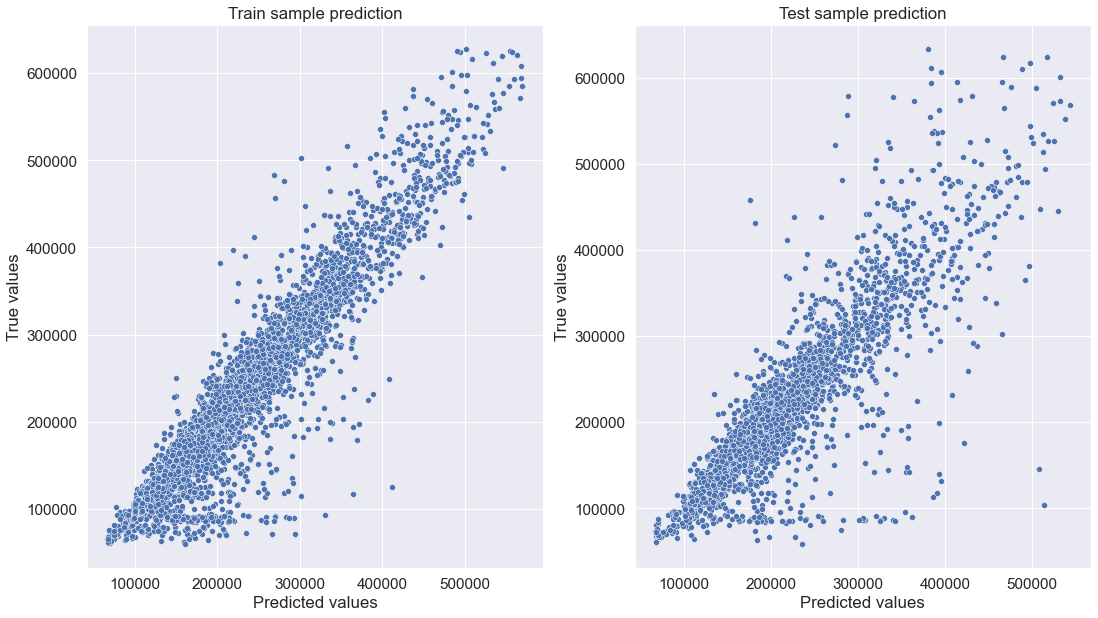

In [108]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [109]:
cv_score = cross_val_score(
    rf_model,
    X.fillna(-9999),
    y, scoring='r2',
    cv=KFold(n_splits=5, shuffle=True, random_state=21)
)
cv_score

array([0.77640886, 0.75617617, 0.74543078, 0.77034852, 0.79203526])

### Важность признаков 

In [110]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
20,MedPriceByDistrict,0.458026
1,Square,0.207547
19,Average_Square_Price,0.107197
0,Rooms,0.056136
18,SociaLL,0.030892
6,HouseYear,0.024243
3,KitchenSquare,0.023431
5,HouseFloor,0.015616
12,Social_3,0.014622
4,Floor,0.014382


## Формирование файла с прогнозами

In [111]:
test_id = test_df["Id"]
pred_df = pd.DataFrame()
pred_df["Id"] = test_id
pred_df["Price"] = np.random.randint(0, 1e6, size=test_id.shape[0])
assert pred_df.shape[0] == 5000, f"Real pred-shape = {pred_df.shape[0]}, Expected pred-shape = 5000"

pred_df.to_csv("./VNam_predictions_.csv", index=False)

pred_df = pd.read_csv("./VNam_predictions_.csv")
pred_df.head(n=2)

test_df.shape[0]

5000